# Multiple Linear Regression Homework

## Import packages

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

## Load the North Carolina infant birth dataset

In [2]:
ncbirths = pd.read_csv('ncbirths.csv', index_col = 0)

In [3]:
ncbirths.head()

,ID,Plural,Sex,MomAge,Weeks,Marital,RaceMom,HispMom,Gained,Smoke,BirthWeightOz,BirthWeightGm,Low,Premie,MomRace
1,1,1,1,32,40.0,1,1,N,38.0,0.0,111,3146.85,0,0,white
2,2,1,2,32,37.0,1,1,N,34.0,0.0,116,3288.60,0,0,white
3,3,1,1,27,39.0,1,1,N,12.0,0.0,138,3912.30,0,0,white
4,4,1,1,27,39.0,1,1,N,15.0,0.0,136,3855.60,0,0,white
5,5,1,1,25,39.0,1,1,N,32.0,0.0,121,3430.35,0,0,white


## The Meaning of Each Feature
- Plural: whether the infant is a singlet, doublet or triplet, etc
- Sex: gender of the child
- MomAge: mother's age
- Weeks: completed week of gestation
- Marital: marital status of the mom
- RaceMom: encoding of mom's race (compared to MomRace)
- HispMom: whether mom is hispanic 
- Gained: the total weight the mother has gained during pregnancy
- Smoke: If the mom is a smoker
- BirthWeightOz & BirthWeightGm: the birth weight in oz or in grams
- Low: bool indicator of low birth weight infant
- Premie: bool indicator of premature birth
- MomRace: the ethnic group of the mom as a string

## Q1. Visualize the dataset. Check the distribution of all the numeric variables
- Use **his**

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x105914908>,
      dtype=object)

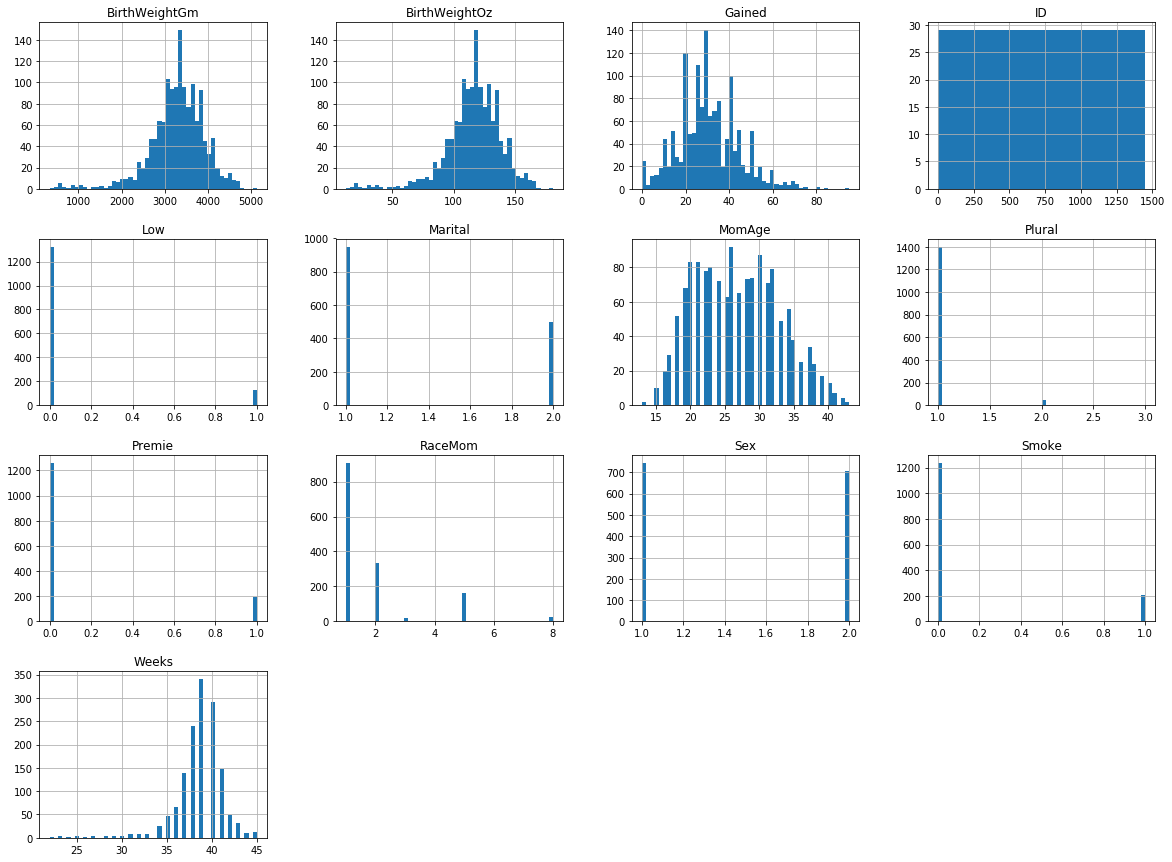

In [4]:
ncbirths.?

## Q2. Descriptive Statistics

- Check the descriptive statistics of the numerical columns using dataframe **describe** method
- Output the count distribution of each categorical feature using series **value_counts** method

In [5]:
ncbirths.?

,ID,Plural,Sex,MomAge,Weeks,Marital,RaceMom,Gained,Smoke,BirthWeightOz,BirthWeightGm,Low,Premie
count,1450.000000,1450.000000,1450.000000,1450.000000,1449.000000,1450.000000,1450.000000,1410.000000,1445.000000,1450.000000,1450.000000,1450.000000,1450.000000
mean,725.500000,1.036552,1.486897,26.758621,38.621118,1.344828,1.831034,30.601418,0.144637,116.247586,3295.619069,0.086207,0.131724
std,418.723258,0.201894,0.500001,6.097297,2.699114,0.475476,1.491546,13.877493,0.351856,22.327231,632.977007,0.280766,0.338307
min,1.000000,1.000000,1.000000,13.000000,22.000000,1.000000,1.000000,0.000000,0.000000,12.000000,340.200000,0.000000,0.000000
25%,363.250000,1.000000,1.000000,22.000000,38.000000,1.000000,1.000000,20.000000,0.000000,106.000000,3005.100000,0.000000,0.000000
50%,725.500000,1.000000,1.000000,26.000000,39.000000,1.000000,1.000000,30.000000,0.000000,118.000000,3345.300000,0.000000,0.000000
75%,1087.750000,1.000000,2.000000,31.000000,40.000000,2.000000,2.000000,40.000000,0.000000,130.000000,3685.500000,0.000000,0.000000
max,1450.000000,3.000000,2.000000,43.000000,45.000000,2.000000,8.000000,95.000000,1.000000,181.000000,5131.350000,1.000000,1.000000


In [6]:
categorical = []

for feature in categorical:
    print(ncbirths[feature].?)
    print('')

1    1401
2      45
3       4
Name: Plural, dtype: int64

1    744
2    706
Name: Sex, dtype: int64

1    950
2    500
Name: Marital, dtype: int64

1    906
2    332
5    164
8     23
3     22
4      2
7      1
Name: RaceMom, dtype: int64

0.0    1236
1.0     209
Name: Smoke, dtype: int64

0    1325
1     125
Name: Low, dtype: int64

0    1259
1     191
Name: Premie, dtype: int64

white       906
black       332
hispanic    164
other        48
Name: MomRace, dtype: int64



## Q3. Preparing the data for Multiple Linear Regression
- Decide which of the features is quantitative, which are nominal categorical, which are ordinal categorical
- Are there any missing values within the dataset? 
- Which columns contain missing values?
- For simplicity, please remove the rows containing missing values
- We plan to run a linear regression of 'BrithWeightGm' against features in 
['Plural','Sex','MomAge','Weeks','Marital','RaceMom', 'HispMom', 'Gained','Smoke','Low','Premie']
- To do so, we need to 
    - convert string binary categorical values into 0 and 1
    - dummify nominal categorical features (droping the dominant category)

In [ ]:
Excluding **ID**, there are 14 distinct features, they can be classified into quantitative, ordinal and nominal categorical types

- Quantitative
   - ?
    
- Ordinal Categorical
   - ?
    
- Nominal Categorical
   - ?

In [7]:
# Generate the boolean flags indicating missing rows and columns
missingRows = ?
missingCols = ?
print('The columns with missingness are %s' %(ncbirths.columns[missingCols]))
ncbirths = ncbirths[?]  # remove rows with missingness

The columns with missingness are Index(['Weeks', 'Gained', 'Smoke'], dtype='object')


In [8]:
birthFeatures = ncbirths[['Plural','Sex','MomAge','Weeks','Marital','RaceMom', 'HispMom', 'Gained','Smoke','Low','Premie']].copy()
weights       = ncbirths['BirthWeightGm']
birthFeatures['HispMom'] =  # convert characters into 0 and 1
dummy         = pd.get_dummies(?, prefix='Race')
dummy.drop(, axis=?, inplace=?) # race 1 is the dominant category
birthFeatures = birthFeatures.drop('RaceMom', axis=?)  # drop the original RaceMom feature
birthFeatures = pd.concat(?, axis=?) # concat birthFeatures and dummy horizontally
birthFeatures.head()

,Plural,Sex,MomAge,Weeks,Marital,HispMom,Gained,Smoke,Low,Premie,Race_2,Race_3,Race_4,Race_5,Race_7,Race_8
1,1,1,32,40.0,1,0,38.0,0.0,0,0,0,0,0,0,0,0
2,1,2,32,37.0,1,0,34.0,0.0,0,0,0,0,0,0,0,0
3,1,1,27,39.0,1,0,12.0,0.0,0,0,0,0,0,0,0,0
4,1,1,27,39.0,1,0,15.0,0.0,0,0,0,0,0,0,0,0
5,1,1,25,39.0,1,0,32.0,0.0,0,0,0,0,0,0,0,0


## Q4. Before preparing the data for machine learning, please list the assumptions of multiple linear regression.

In [9]:
# linearity
# normality
# homoscedasticity
# independent error: Durbin-Watson
# no multicollinearity: Cond. No.

## Q5A. Machine Learning with Multiple Linear Regression 
- Now run a multiple linear regression model of birth weights (in grams) 
against the birth features created in the previous step
- Report the $R^2$ score on the train set
- Investigate the histogram of the residuals using plt.hist function
- Compute the **RSS** using numpy and the model's predict method
- Interpret the meaning of the **MomAge** slope coefficient
- Report the intercept and slope coefficients of the linear model
- Report the column names with negative and positive slope coefficients

//anaconda/lib/python3.5/site-packages/scipy/linalg/basic.py:1226: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


(array([ 18.,  59., 183., 332., 342., 238., 146.,  60.,  23.,   8.]),
 array([-1107.76823841,  -857.46437566,  -607.16051291,  -356.85665016,
         -106.55278741,   143.75107534,   394.05493809,   644.35880084,
          894.66266359,  1144.96652635,  1395.2703891 ]),
 <a list of 10 Patch objects>)

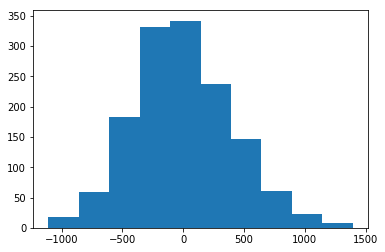

In [10]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression()
lm.fit(?, ?)
residuals = weights - lm.predict(?)
plt.hist(residuals)

In [11]:
print('R^2 is equal to %.3f' %(?))
print('RSS is equal to %.3f' %(?))
print('The intercept is %.3f' %(?))
print('The slopes are %s' %(?))

R^2 is equal to 0.574
RSS is equal to 236027195.522
The intercept is 881.980
The slopes are [-320.70693681  -95.24917399    8.83271726   68.97292512  -46.70144034
  137.61355277    6.03382378 -161.51313286 -973.77780523  -42.86118021
  -78.52438752  -23.10193399   34.09451069 -134.19785515 -858.96717076
  -76.04344075]


In [12]:
print('negative slope column names %s' %(birthFeatures.columns[?]))
print('positive slope column names %s' %(birthFeatures.columns[?]))


negative slope column names Index(['Plural', 'Sex', 'Marital', 'Smoke', 'Low', 'Premie', 'Race_2',
       'Race_3', 'Race_5', 'Race_7', 'Race_8'],
      dtype='object')
positive slope column names Index(['MomAge', 'Weeks', 'HispMom', 'Gained', 'Race_4'], dtype='object')


## Q5B. Running a Linear Model using Log(BirthWeights)
- When we analyze the histogram of residuals, we may notice the distribution is slightly skewed. 
- We may improve this by running a linear model of log(birthWeight) against the birthFeatures instead
- Investigate the histogram of the residuals with this linear model
- Compute its $R^2$ and decide if the $R^2$ improves or drops

(array([  2.,   2.,   4.,   3.,  13., 109., 489., 563., 207.,  17.]),
 array([-1.09346189, -0.93951983, -0.78557778, -0.63163572, -0.47769366,
        -0.3237516 , -0.16980955, -0.01586749,  0.13807457,  0.29201662,
         0.44595868]),
 <a list of 10 Patch objects>)

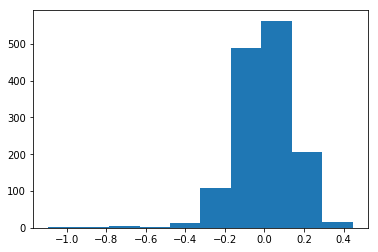

In [13]:
lm.fit(, )
residuals = ? - lm.predict(birthFeatures)
plt.hist(residuals)

In [ ]:
print('The R^2 of the new linear model is %.3f ' %(?))

- This linear model has a much higher $R^2$ compared to the orginal one

## Q6. Selecting Three Dominant Features by Brute Force
- It is well known that given $16$ distinct features, there are $C^{16}_3={16! \over 3! 13!}={16\times 15 \times 14\over 1\times 2\times 3}=560$ choices of 3-feature combinations, like ('Plural', 'Sex', 'MomAge') or ('Plural', 'Sex', 'Gained'), ....
- We would like to study among all $560$ possibilities, 
which 3-feature combination provides the highest $R^2$. This concept is known to be **feature selection**.
- Complete the following code segment and find out which 3-feature combination has the best training $R^2$ performance

In [14]:
scores = {} # used to record the R^2 of each 3-feature combinations

for idx, name1 in enumerate(birthFeatures.columns):
        myColumns = birthFeatures.columns[(idx+1):]
        pass

In [16]:
# Find the 3-tuple with the highest $R^2$

[(('Weeks', 'Gained', 'Low'), 0.627723278193494),
 (('MomAge', 'Weeks', 'Low'), 0.6261574035772546),
 (('Weeks', 'Marital', 'Low'), 0.6243776455426664),
 (('Weeks', 'Smoke', 'Low'), 0.6214925519830982),
 (('Weeks', 'Low', 'Race_2'), 0.6210956408211481),
 (('Sex', 'Weeks', 'Low'), 0.6204856917518329),
 (('Plural', 'Weeks', 'Low'), 0.618936156443874),
 (('Weeks', 'Low', 'Race_7'), 0.617987168582858),
 (('Weeks', 'Low', 'Premie'), 0.6178631212672792),
 (('Weeks', 'Low', 'Race_4'), 0.6174835230314689),
 (('Weeks', 'HispMom', 'Low'), 0.6173846235492663),
 (('Weeks', 'Low', 'Race_5'), 0.6173682028132106),
 (('Weeks', 'Low', 'Race_3'), 0.6173256753248844),
 (('Weeks', 'Low', 'Race_8'), 0.6173115359974118),
 (('Gained', 'Low', 'Premie'), 0.547406200021286),
 (('MomAge', 'Low', 'Premie'), 0.5433326263112778),
 (('Marital', 'Low', 'Premie'), 0.5420188291937138),
 (('Plural', 'Low', 'Premie'), 0.5405207271634211),
 (('Low', 'Premie', 'Race_2'), 0.5397012272750539),
 (('Smoke', 'Low', 'Premie'), 0

- From the above computation, it is clear that from a descriptive model stand-point 
the best 3-feature combination is ?

## Q7. Linear Models by Statsmodels Package

- Use the 'statsmodels' package to fit a linear model with an intercept
- Use the p-value estimation of **statsmodels** slope coefficients and intercept to determine which coefficients
are significant (up to 5% threshold)

${\bf Hint}$: To check significance, look for the **pvalues** attribute of the output object of the model.fit()

In [17]:
import statsmodels.api as sm
x = sm.add_constant(?)
# Notice that the dependent variable (y) comes before the independent variables (x)
# Use df.columns.values to get all the column names
model = sm.OLS(?, ?)
results = model.fit()
print(?) # How to print out the summary report

//anaconda/lib/python3.5/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


                            OLS Regression Results                            
Dep. Variable:          BirthWeightGm   R-squared:                       0.653
Model:                            OLS   Adj. R-squared:                  0.649
Method:                 Least Squares   F-statistic:                     163.7
Date:                Tue, 25 Sep 2018   Prob (F-statistic):          1.01e-305
Time:                        09:52:44   Log-Likelihood:                 681.79
No. Observations:                1409   AIC:                            -1330.
Df Residuals:                    1392   BIC:                            -1240.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.5948      0.098     67.206      0.0

In [ ]:
pValues = ?
print('The significant coefficients')
pValues[?]

In [2]:
print('The insignificant coefficients')
pValues[?]

## Q8. Conceptual Questions on Linear Models

- According to the summary table that you created, please explain the following questions:
    - What is OLS?
    - What is the Least Squares method?
    - How do you interpret the R-squared score of this model?
    - How do you interpret the interval [0.025 0.975] of CRIM?


In [19]:
# OLS stands for "Ordinary Least Squares"
# “Least Squares” method fits a regression line that would minimize the square of distance of the residuals from the regression line.
# R-squared: the percentage of variance our model explains. In this ols model, it explains 65.3% of variance.
# The coefficient of 0.002 means that as the GAINED variable increases by 1, the predicted value of log weight increases by 0.002. 
# T-scores and p-values, for hypothesis test 
# the GAINED does have statistically significant p-value. Thus, we reject the null hypothesis that assumes X (GAINED) has no effect on Y (PRICE)
# For the GAINED slope, we predict at a 95% percent confidence that the value of GAINED slope is between 0.001 and 0.003

# https://www.datarobot.com/blog/ordinary-least-squares-in-python/

In [20]:
# References
# https://pythonandr.com/2016/07/19/scikit-learn-linear-regression-example/
# https://elitedatascience.com/python-machine-learning-tutorial-scikit-learn